In [1]:
from utils.libraries import *
from utils.objects import *
from utils.functions import *

### Preparing the data

In [2]:
# Se utiliza un rango de 20 años para la extraccion de datos económicos
timeframe = 365*20
today = datetime.today()
end = today.strftime("%Y-%m-%d")
start = (today - dt.timedelta(days=timeframe)).strftime("%Y-%m-%d")

medidas = ["mean", "median", "mode", "Min", "Percentil_25", "Percentil_75","Max", "var", "std", "skew", "kurt"]

In [3]:
# Initialize the Economic Data Analyzer class
eda = EconomicDataAnalyzer()
# Load the market data config
market = eda.read_config(r'C:\Users\Joan Oliver\BullGlobe\Investing Scripts\Economic_Market_Forecasting\src\config\Market_Data_Config.csv')
market_dict = eda.convert_to_dictionary()
market_dict = market_dict['Market']

# Load the economic data config
econ = eda.read_config(r'C:\Users\Joan Oliver\BullGlobe\Investing Scripts\Economic_Market_Forecasting\src\config\Economic_Data_Config.csv')
fred_series_dict = eda.convert_to_dictionary()
fred_series_dict = fred_series_dict["Indicador"]
calc = eda.read_config(r'C:\Users\Joan Oliver\BullGlobe\Investing Scripts\Economic_Market_Forecasting\src\config\Calc_Data_Config.csv')
series_calc_dict = eda.convert_to_dictionary()
series_calc_dict = series_calc_dict["Indicador"]

# Setting up the indicator dictionaries
indicators = {}
for ind in list(econ["Tipo"].unique()):
    indicators[ind] = econ[econ["Tipo"] == ind]["Indicador"].to_list()

In [4]:
# Extracting the indicator data
indicators_df = eda.indicator_extraction(fred_series_dict, series_calc_dict)

Indicators Extracted: Index(['10-Year Treasury Yield', '2-Year Treasury Yield',
       'Federal Funds Effective Rate', '1-Month Treasury Yield',
       '3-Month Treasury Yield', '5-Year Treasury Yield',
       '20-Year Treasury Yield', '30-Year Treasury Yield',
       '15-Year Mortgage Rate', '30-Year Mortgage Rate', 'Unemployment Rate',
       'GDP', 'Real GDP', 'CPI', 'PPI', 'Consumer Confidence Index',
       'Government Debt', 'Government Debt to GDP', 'US Dollar Index',
       'Corporate Profits', 'Building Permits', 'Velocity of Money',
       'Retail Sales', 'Industrial Production', '3m5y', '3m10y', '2y10y',
       '2y20y', '5y10y', '10y30y', '10yTrea30yFRM'],
      dtype='object')


In [5]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16023 entries, 1962-01-02 to 2023-06-01
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   10-Year Treasury Yield        15340 non-null  float64
 1   2-Year Treasury Yield         11748 non-null  float64
 2   Federal Funds Effective Rate  16023 non-null  float64
 3   1-Month Treasury Yield        5462 non-null   float64
 4   3-Month Treasury Yield        10438 non-null  float64
 5   5-Year Treasury Yield         15340 non-null  float64
 6   20-Year Treasury Yield        13651 non-null  float64
 7   30-Year Treasury Yield        11570 non-null  float64
 8   15-Year Mortgage Rate         1656 non-null   float64
 9   30-Year Mortgage Rate         2721 non-null   float64
 10  Unemployment Rate             526 non-null    float64
 11  GDP                           175 non-null    float64
 12  Real GDP                      175 non-null 

<AxesSubplot:>

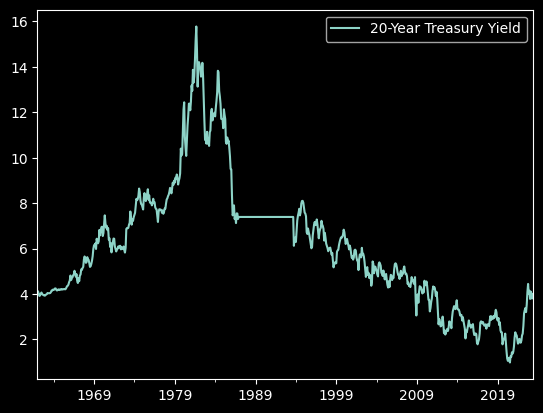

In [11]:
indicators_monthly = indicators_df.resample('M').last()
indicators_monthly.fillna(method="ffill").iloc[:,6:7].plot()

In [ ]:
# Extracting the market data
stocks = list(market_dict.keys())
market_df = eda.market_extraction(stocks, start, end)

KeyboardInterrupt: 

[**********************86%****************       ]  12 of 14 completed

In [ ]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6289 entries, 1998-06-02 00:00:00-04:00 to 2023-05-26 00:00:00-04:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIA     6289 non-null   float64
 1   GDX     4284 non-null   float64
 2   IYR     5772 non-null   float64
 3   SPY     6289 non-null   float64
 4   XLB     6147 non-null   float64
 5   XLE     6145 non-null   float64
 6   XLF     6147 non-null   float64
 7   XLI     6147 non-null   float64
 8   XLK     6147 non-null   float64
 9   XLP     6147 non-null   float64
 10  XLU     6147 non-null   float64
 11  XLV     6147 non-null   float64
 12  XLY     6147 non-null   float64
 13  ^IXIC   6289 non-null   float64
dtypes: float64(14)
memory usage: 737.0 KB


In [7]:
# Cleaning the economic data
df_indicators, df_indicators_limpio = eda.limpiar_indicators(
    df_indicators=indicators_df,
    indicator_dict=indicators,
    resample="M",
    fill_method="ffill",
    start=start,
    end=end)

<AxesSubplot:>

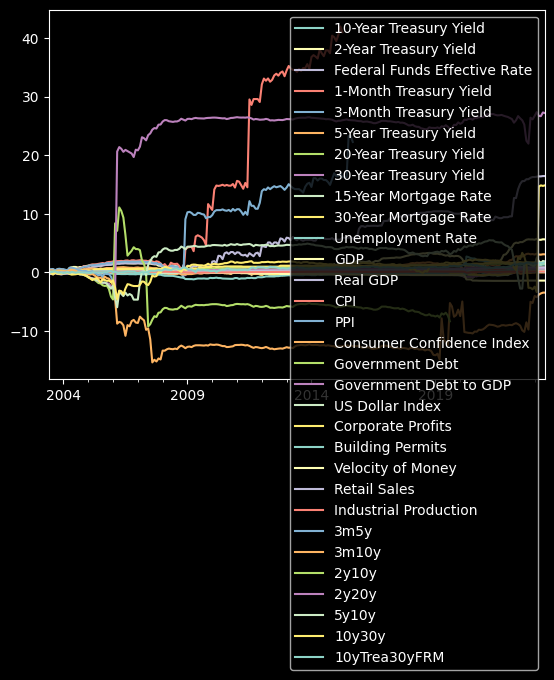

In [10]:
df_indicators_limpio.pct_change().cumsum().plot()

In [ ]:
# Cleaning the market data
df_markets, df_market_rets, df_market_cum = eda.limpiar_markets(markets_dict=market_dict,start=start,end=end)

In [ ]:
ind_types = list(indicators.keys())
market_types = ["market_hist", "market_rets", "market_cum"]
ind_mkt_types = ind_types+market_types
market_analysis = ["SP500","NASDAQ","Gold"]

In [ ]:
# Save all indicators and market data in a dictionary
indicators_dict = {}
data_dict = {}
for ind in ind_mkt_types:
    if "market" in ind:
        indicators_dict[ind] = pd.read_csv(r'C:\Users\Joan Oliver\BullGlobe\Investing Scripts\Economic_Market_Forecasting\src\data\processed\markets\{0}.csv'.format(ind),index_col=0, header=0)
        for mkt in market_analysis:
            data_dict[mkt] = indicators_dict[ind][[mkt]]
    else:
        indicators_dict[ind] = pd.read_csv(r'C:\Users\Joan Oliver\BullGlobe\Investing Scripts\Economic_Market_Forecasting\src\data\processed\indicators\{0}.csv'.format(ind),index_col=0, header=0)
        data_dict[ind] = indicators_dict[ind]

In [ ]:
# Perform univariant analysis
indicator_stats, indicator_dict = eda.analisis_univariante(indicators=data_dict, medidas=medidas)

In [ ]:
indicator_stats

,mean,median,mode,Min,Percentil_25,Percentil_75,Max,var,std,skew,kurt
10-Year Treasury Yield,10-Year Treasury Yield -0.001208 2-Yea...,-0.005,0.0,-0.74,-0.08,0.08,0.57,0.015515,0.124558,-0.14936,2.134336
2-Year Treasury Yield,10-Year Treasury Yield -0.001208 2-Yea...,0.0,0.0,-0.76,-0.05,0.05,0.64,0.012822,0.113235,-0.432051,6.241842
Federal Funds Effective Rate,10-Year Treasury Yield -0.001208 2-Yea...,0.0,0.0,-0.93,-0.01,0.01,0.75,0.011211,0.105882,-0.8548,29.565213
1-Month Treasury Yield,10-Year Treasury Yield -0.001208 2-Yea...,0.0,0.0,-1.57,-0.02,0.03,1.49,0.022349,0.149496,-1.209651,34.429145
3-Month Treasury Yield,10-Year Treasury Yield -0.001208 2-Yea...,0.0,0.0,-1.38,-0.01,0.02,0.67,0.01038,0.101882,-4.204884,52.478987
5-Year Treasury Yield,10-Year Treasury Yield -0.001208 2-Yea...,0.0,0.0,-0.5,-0.07,0.07,0.62,0.016383,0.127994,-0.052848,1.812831
20-Year Treasury Yield,10-Year Treasury Yield -0.001208 2-Yea...,-0.01,0.0,-0.7,-0.08,0.07,0.47,0.014218,0.11924,-0.146757,2.058804
30-Year Treasury Yield,10-Year Treasury Yield -0.001208 2-Yea...,0.0,0.0,-0.7,-0.07,0.07,0.42,0.013351,0.115548,-0.384587,2.829309
15-Year Mortgage Rate,10-Year Treasury Yield -0.001208 2-Yea...,-0.01,0.0,-0.42,-0.05,0.04,0.52,0.00904,0.095081,0.679791,5.237111
30-Year Mortgage Rate,10-Year Treasury Yield -0.001208 2-Yea...,-0.01,0.0,-0.47,-0.05,0.04,0.55,0.009528,0.09761,0.675934,5.143212


,SP500
mean,0.0004
median,0.0006
mode,0.0000
Min,-0.1094
Percentil_25,-0.0050
Percentil_75,0.0062
Max,0.1452
var,0.0002
std,0.0125
skew,-0.0186


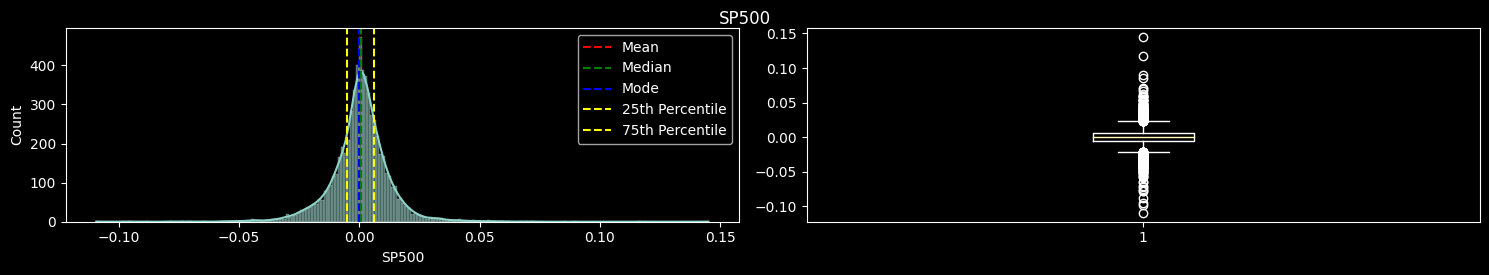

In [ ]:
eda.plot_univariante(indicator="SP500", indictator_dict=indicator_dict, medidas=medidas)

In [ ]:
market_df.columns = list(market_dict.values())

In [ ]:
df_market_cum.columns = list(market_dict.values())

In [ ]:
market_df.index = market_df.index.strftime("%Y-%m-%d")

In [ ]:
indicators_dict.keys()

dict_keys(['irates', 'unemployment', 'gdp', 'inflation', 'cci', 'gov_debt', 'usd', 'profits', 'housing', 'velocity', 'sales', 'production', 'irate_yld', 'market_hist', 'market_rets', 'market_cum'])

In [ ]:
df_ind_mkt, df_ind_mkt_values, df_corr = eda.analisis_bivariante(
    markets=["SP500"], 
    indicators_names=["CPI","PPI"],
    stock_start=start,
    stock_end=end, 
    df_market_cum=df_market_cum, 
    df_market_hist=market_df, 
    inds_dict={"inflation":indicators_dict["inflation"]}
    )

,CPI
SP500,0.2625


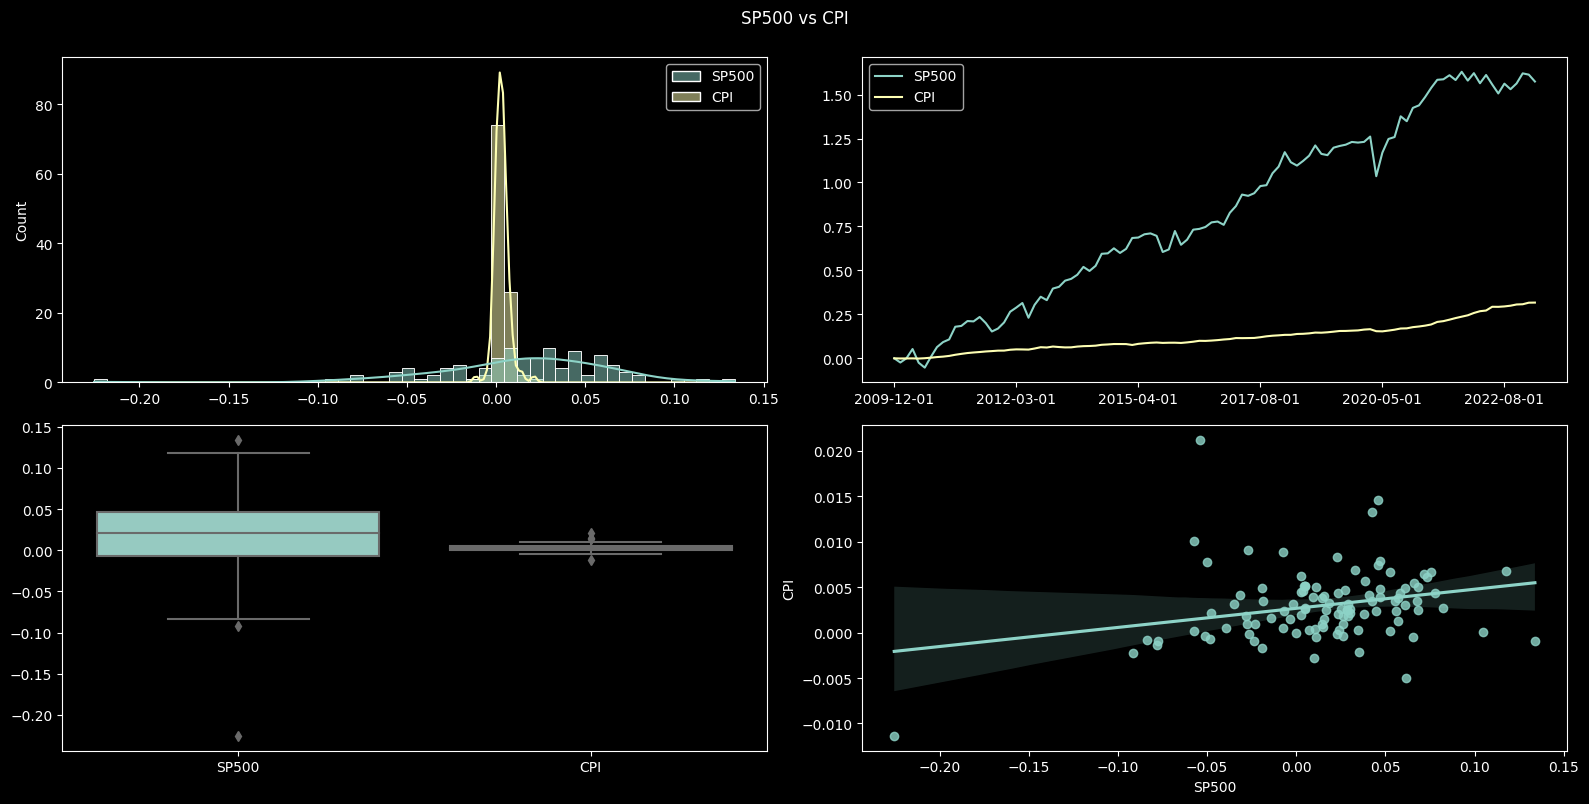

,PPI
SP500,0.3715


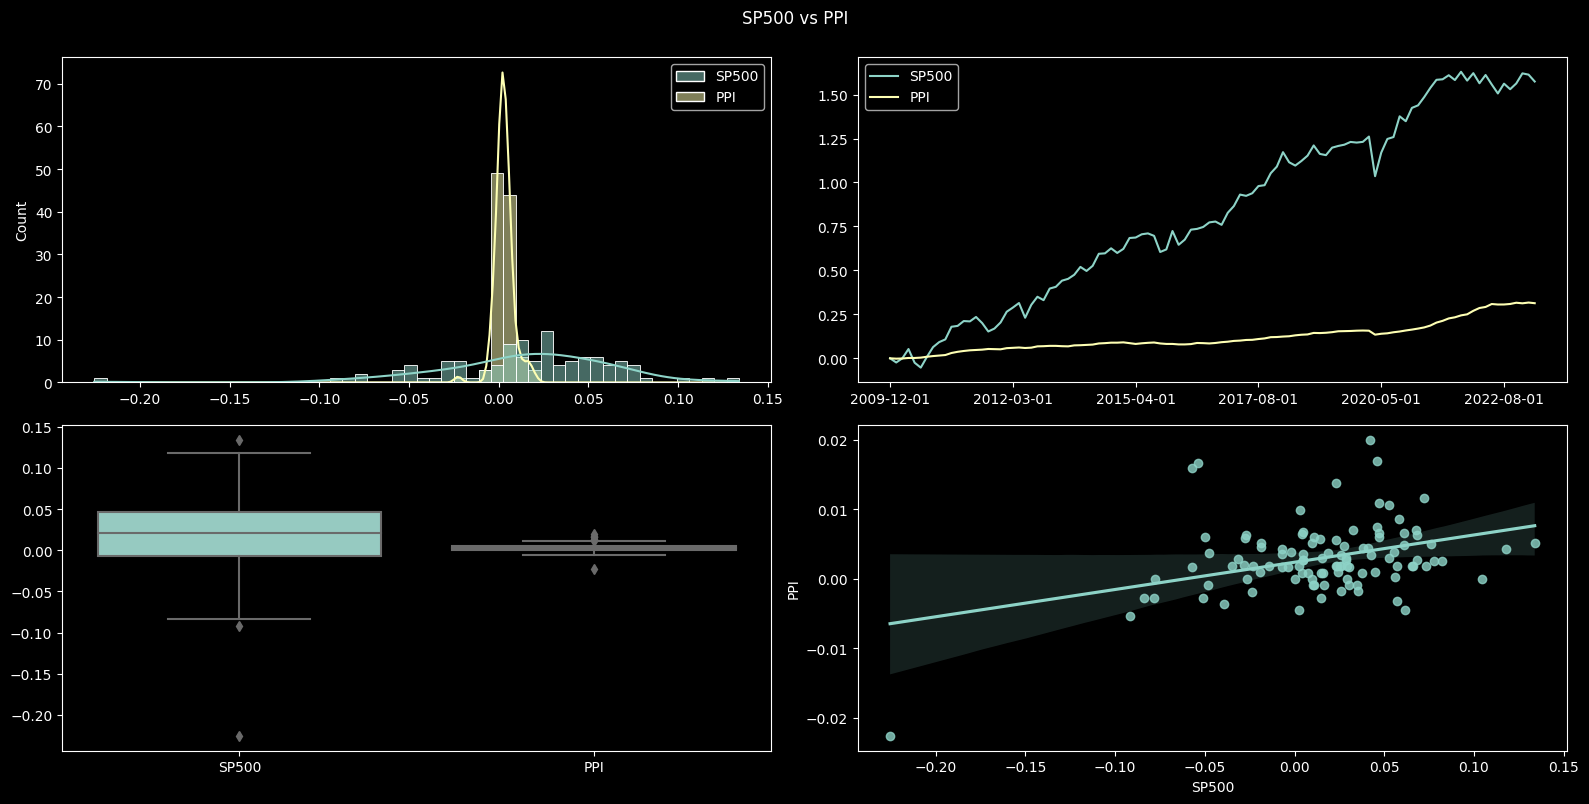

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [ ]:
eda.plot_bivariant(
    markets=["SP500"],
    indicators_names=["CPI","PPI"],
    df_ind_mkt=df_ind_mkt,
    df_ind_mkt_values=df_ind_mkt_values,
    df_corr=df_corr
)

### Machine Learning

In [ ]:
df_indicators_rets = pd.DataFrame()
for ind in df_indicators_limpio.columns:
    if "Yield" in ind:
        df_indicators_rets[ind] = df_indicators_limpio[ind].loc[start:]
    else:
        df_indicators_rets[ind] = df_indicators_limpio[ind].loc[start:].pct_change()

NameError: name 'pd' is not defined

In [ ]:
df_indicators_rets = pd.DataFrame()
for ind in df_indicators_limpio.columns:
    df_indicators_rets[ind] = df_indicators_limpio[ind].loc["2010":].pct_change()

In [ ]:
df_indicators_rets.cumsum().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3495 entries, 2010-01-01 to 2023-05-25
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   10-Year Treasury Yield        3494 non-null   float64
 1   2-Year Treasury Yield         3494 non-null   float64
 2   Federal Funds Effective Rate  3494 non-null   float64
 3   1-Month Treasury Yield        3434 non-null   float64
 4   3-Month Treasury Yield        3488 non-null   float64
 5   5-Year Treasury Yield         3494 non-null   float64
 6   20-Year Treasury Yield        3494 non-null   float64
 7   30-Year Treasury Yield        3494 non-null   float64
 8   15-Year Mortgage Rate         3494 non-null   float64
 9   30-Year Mortgage Rate         3494 non-null   float64
 10  Unemployment Rate             3494 non-null   float64
 11  GDP                           3494 non-null   float64
 12  Real GDP                      3494 non-null 